# Imports

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

# Definicion de constantes

In [2]:
# Constantes
# velocidad de la plataforma [m/s]
v = 108

# frecuencia de muestreo en rango [Hz]
f_s = 50e6

# pulse repetition frequency [Hz]
prf = 125

# frecuencia de la portadora [Hz]
frecuencia_de_la_portadora = 1300*10e6

# longitud de chirp emitido (T_rg) [s]
T_rg = 10e-6

# ancho de banda del chirp emitido [Hz]
BW_rg = 38e6

# longitud de onda [m]
longitud_de_onda = 0.23

# rango central [m]
r_0 = 7545

# apretura_angular_de_la_antena_en_acimut [rad]
apretura_angular_de_la_antena_en_acimut = 0.107

## Definicion de constantes para trabajar en forma simbolica

In [3]:
# symbolyc notation

# constantes dadas
sim_v, sim_f_s, sim_prf = symbols('v f_s prf')
sim_frecuencia_de_la_portadora, sim_T_rg, sim_BW_rg = symbols('frecuencia_de_la_portadora T_rg BW_rg')
sim_longitud_de_onda, sim_r_0, sim_apertura_angular_de_la_antena_en_acimut = symbols('longitud_onda r_0 apertura_angular_de_la_antena_en_acimut')

# var temporal
sim_t = symbols('t')

# chirp signal related
sim_k_1, sim_k_2, sim_phi_0 = symbols('k_1 k_2 phi_0')

sim_chirp, sim_theta = symbols('chirp(t) theta(t)')

sim_theta = sim_k_1 * sim_t**2 + sim_k_2 * sim_t + sim_phi_0

sim_chirp = E**(I*2*pi*sim_theta)

# Ejercicio 1

Se pide encontrar tres ctes. Las defino:

In [4]:
sim_T = symbols('T')

Por enunciado sabemos que la longitud de chirp es T_rg. Por lo tanto, vale:

In [5]:
sim_T = sim_T_rg
T = T_rg

Derivando la function theta(t), obtenemos la frecuencia instantanea:

In [6]:
sim_f_inst = diff(sim_theta, sim_t)
sim_f_inst

2*k_1*t + k_2

In [7]:
f_inst = 2 * sim_k_1 * sim_t + sim_k_2

Hay que evaluar la frecuancia instantanea en t = 0 y t = T.

In [8]:
eq1 = Eq(2 * sim_k_1 * 0 + sim_k_2 + sim_BW_rg)

eq2 = Eq(2 * sim_k_1 * sim_T + sim_k_2 - sim_BW_rg)

sol = solve((eq1,eq2),(sim_k_1,sim_k_2))

## Resultados

### Simbolicos

In [9]:
sol[sim_k_1]

BW_rg/T_rg

In [10]:
sol[sim_k_2]

-BW_rg

In [11]:
sim_T

T_rg

### Numéricos

In [12]:
# Valores reales
k_1 = sol[sim_k_1].subs({sim_BW_rg:BW_rg, sim_T_rg:T_rg})

k_2 = sol[sim_k_2].subs({sim_BW_rg:BW_rg})

print("valor k_1: " + str(k_1))
print("valor k_2: " + str(k_2))
print("valor T: " + str(T))

valor k_1: 3800000000000.00
valor k_2: -38000000.0000000
valor T: 1e-05


# Ejercicio 2

In [13]:
re(sim_chirp)

exp(-2*pi*im(phi_0) - 2*pi*im(k_1*t**2) - 2*pi*im(k_2*t))*cos(2*pi*re(phi_0) + 2*pi*re(k_1*t**2) + 2*pi*re(k_2*t))

In [14]:
im(sim_chirp)

exp(-2*pi*im(phi_0) - 2*pi*im(k_1*t**2) - 2*pi*im(k_2*t))*sin(2*pi*re(phi_0) + 2*pi*re(k_1*t**2) + 2*pi*re(k_2*t))

In [70]:
def theta(t, k_1, k_2, phi_0):
    return np.array(k_1 * t**2 + k_2 * t + phi_0).astype(np.float64)

def chirp(time, freq):
    res = []
    re = re_chirp(time, freq)[1]
    im = im_chirp(time, freq)[1]
    for i in range(len(re)):
        res.append(re[i] + 1j*im[i])
    return (re[0], res)
#     t = np.linspace(start = 0, stop = time, num = time*freq)
#     return np.exp(2j*np.pi*theta(t, k_1, k_2, 0))

def re_chirp(time, freq):
    t = np.linspace(start = 0, stop = time, num = time*freq)
#     return chirp(time, freq).real
    return (t, np.cos(2*np.pi*theta(t, k_1, k_2, 0)))

def im_chirp(time, freq):
    t = np.linspace(start = 0, stop = time, num = time*freq)
    return (t, np.sin(2*np.pi*theta(t, k_1, k_2, 0)))

## Chirp: parte real

/home/rozanecm/Documents/Univerza/UBA/6674 sys/tp/venv/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


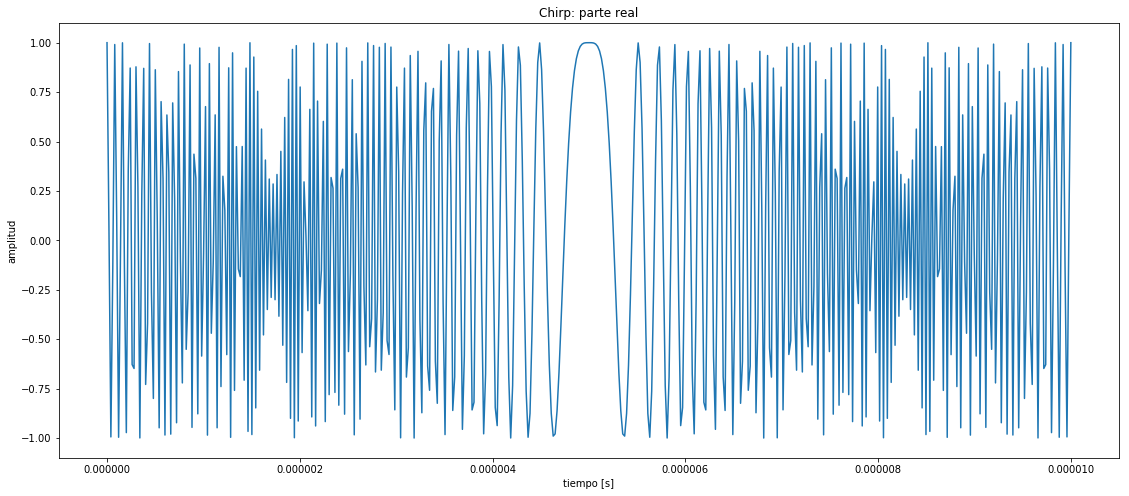

In [35]:
res = re_chirp(T_rg, f_s)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], res[1])
plt.title('Chirp: parte real')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud')

plt.savefig('../res/02 - chirp real.png')
plt.show();

## Chirp: parte imaginaria

/home/rozanecm/Documents/Univerza/UBA/6674 sys/tp/venv/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


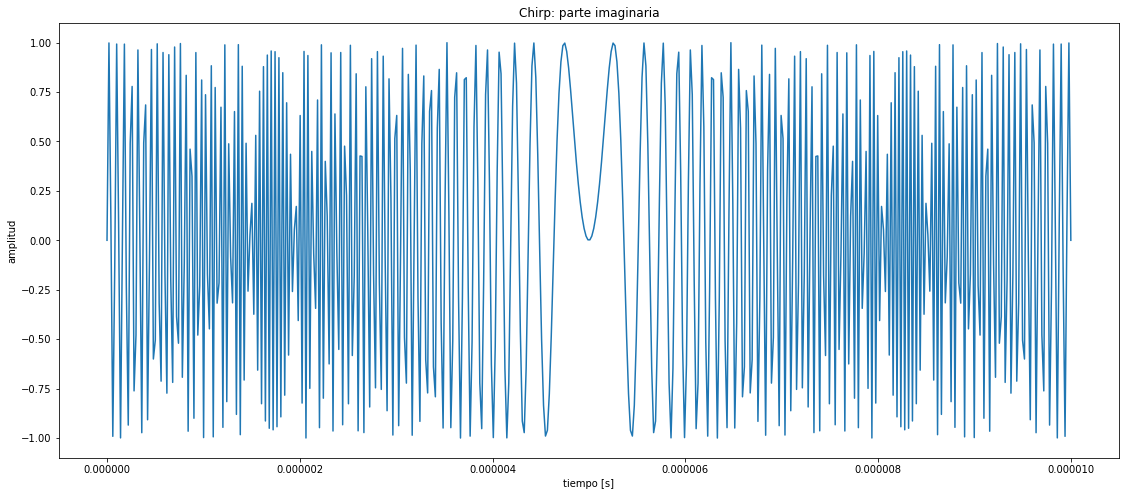

In [17]:
res = im_chirp(T_rg, f_s)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], res[1])
plt.title('Chirp: parte imaginaria')
plt.xlabel('tiempo [s]')
plt.ylabel('amplitud')

plt.savefig('../res/02 - chirp imag.png')
plt.show();

## Chirp: fase

/home/rozanecm/Documents/Univerza/UBA/6674 sys/tp/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


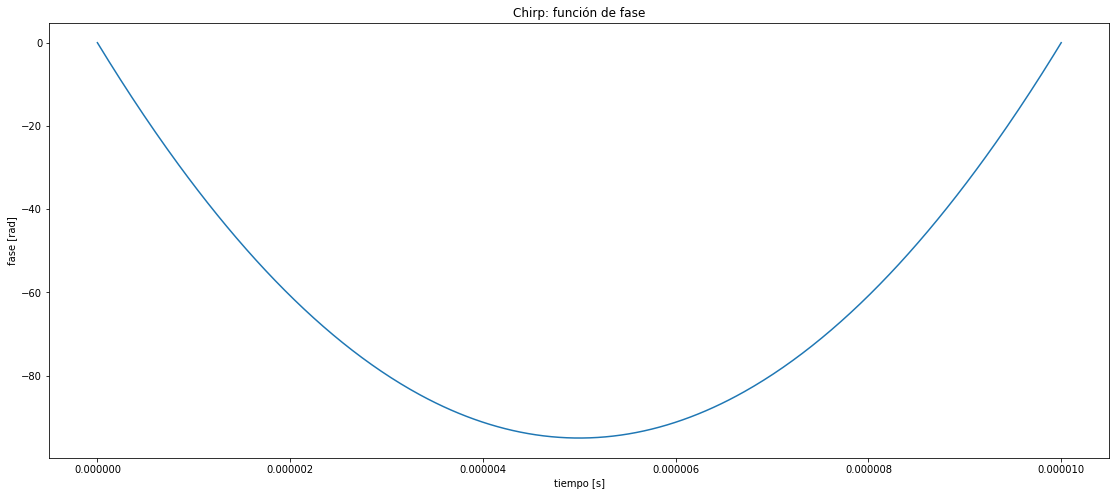

In [18]:
t = t = np.linspace(start = 0, stop = T_rg, num = T_rg*f_s)
res = (t, theta(t, k_1, k_2, 0))
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], res[1])
plt.title('Chirp: función de fase')
plt.xlabel('tiempo [s]')
plt.ylabel('fase [rad]')

plt.savefig('../res/02 - chirp fase.png')
plt.show();

## Chirp: módulo del espectro

In [19]:
from scipy.fftpack import fft, fftfreq

In [72]:
signal = chirp(T_rg, f_s)[1]
espectro = fft(signal)
freqs = fftfreq(len(signal), d=1/f_s)

/home/rozanecm/Documents/Univerza/UBA/6674 sys/tp/venv/lib/python3.5/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/home/rozanecm/Documents/Univerza/UBA/6674 sys/tp/venv/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


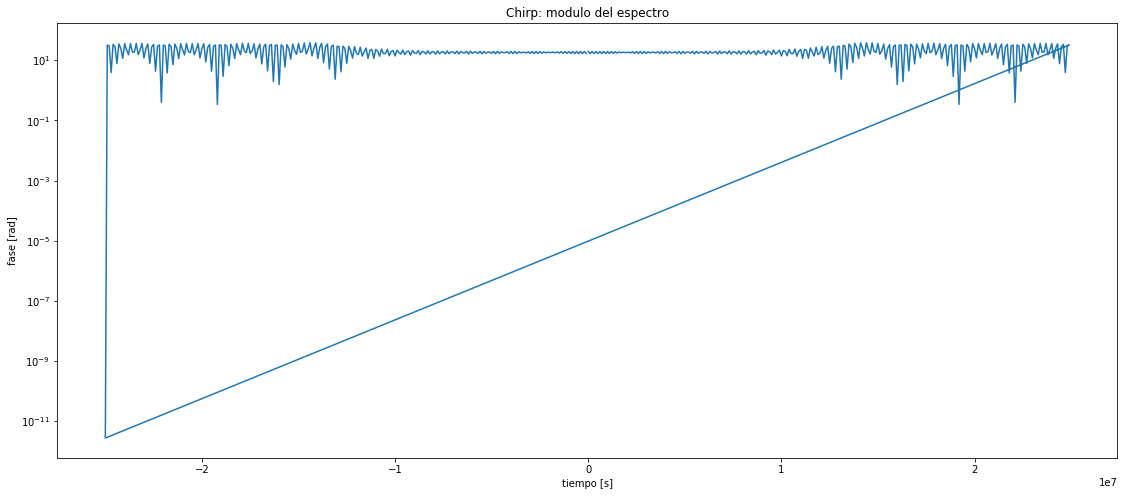

In [83]:
res = (freqs, espectro)
fig = plt.figure(figsize=(19,8))
plt.plot(res[0], abs(res[1]))
plt.title('Chirp: modulo del espectro')
plt.yscale('log')
plt.xlabel('tiempo [s]')
plt.ylabel('fase [rad]')

plt.savefig('../res/02 - chirp modulo de espectro.png')
plt.show();

# Ejercicio 3

## Espectrograma

### Satisface Nyquist

### No satisface Nyquist